Statistical & Machine Learning Methods Assignment:
11/6/24

In [1]:
%pip install pandas matplotlib statsmodels seaborn numpy
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
import numpy as np


[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: python -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


# Time Series Tasks
1. Convert the longitudinal blood pressure measurements into a proper time series: patient_longitudinal.csv
- Time index: formulate time index using specified format
- Time Series: make time series with time index and BP systolic values
- Duplicates: only keep the first value of duplicated numbers
- Missing Values: interpolate to fill in missing values

Interpretation: time series version of systolic blood preassure measurement data with no duplicates or missing values.

In [2]:
long_bp = pd.read_csv('patient_longitudinal.csv', sep='\t')

long_bp['visit_date'] = pd.to_datetime(long_bp['visit_date'], format='%Y-%m-%d') #formulate time index
bp_series = pd.Series(data=long_bp['bp_systolic'].values, index=long_bp['visit_date']) #make time series with time index and BP values

bp_series = bp_series[~bp_series.index.duplicated(keep='first')] #only keep first value of duplicates
bp_series = bp_series.interpolate(method='time') #interpolate to fill in missing values 

bp_series

visit_date
2023-01-17    108.6
2023-02-22    104.8
2023-03-23    106.3
2023-04-16    110.8
2023-06-05    117.7
2023-06-16    118.0
2023-06-21    119.9
2023-07-03    115.5
2023-08-23    119.2
2023-10-13    121.2
2023-10-20    120.0
2023-12-13    123.1
2024-01-17    122.4
2024-03-01    121.3
2024-04-17    122.5
2024-04-04    119.8
2024-03-14    122.4
2024-05-19    119.7
2024-07-03    117.1
2024-05-25    114.8
2024-10-21    116.7
2024-10-05    115.2
2024-11-14    111.8
2025-01-19    110.3
2024-12-07    110.2
2025-02-20    107.3
2025-02-25    104.4
2025-03-25    109.7
2025-04-03    107.5
2025-07-31    106.7
2025-06-17    105.8
2025-08-26    104.7
2025-06-23    106.3
2025-11-12    108.7
2025-12-08    107.9
2025-12-04    104.8
2025-12-22    108.0
2026-02-14    107.8
2026-05-24    112.1
2026-01-26    106.5
2026-05-30    107.0
2026-04-28    111.8
2026-06-30    110.9
2026-07-22    110.3
2026-08-15    111.0
2026-09-30    109.6
2026-09-19    108.9
2027-01-07    108.0
2026-10-26    106.5
2027-02-1

2. Analyze blood pressure trends:
   - Resample the data to monthly frequency using mean aggregation
   - Calculate 3-month moving averages to smooth out short-term fluctuations
   - Visualize both the original and smoothed trends

Interpretation: The original trend has more flucuations especially in 2024 compared to the smoother trend which shows a more consistent/average of data trends. A bar plot did not show this trend as well as a line plot does in terms of seeing the extent of flucuations.

Text(0.5, 1.0, 'Monthly Blood Pressure Trend with 3-Month Moving Average')

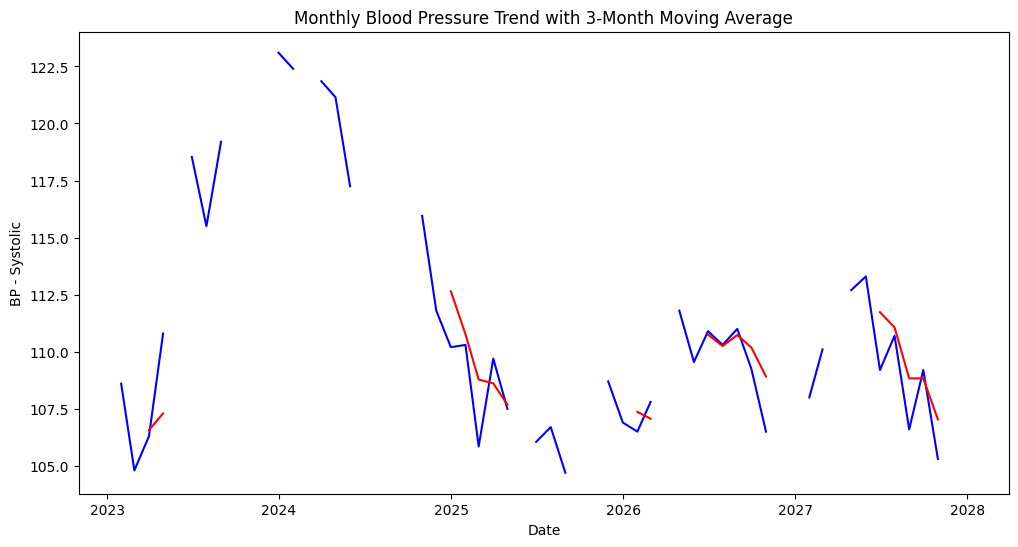

In [3]:
month_end = bp_series.resample('ME').mean() #month-end frequency using mean aggregation
mend_smooth = month_end.rolling(window=3).mean() #smooth out short-term flucutations in 3 month moving avgs

plt.figure(figsize=(12, 6)) #plot both to visualize the original and smoothed trends
plt.plot(month_end, label='Monthly Average BP', color='blue')
plt.plot(mend_smooth, label='3-Month Moving Average', color='red')
plt.xlabel('Date')
plt.ylabel('BP - Systolic')
plt.title('Monthly Blood Pressure Trend with 3-Month Moving Average')

# Statistical Modeling Tasks

1. Analyze factors affecting baseline blood pressure:
   - Use statsmodels OLS to predict `bp_systolic`
   - Include `age`, `bmi`, `smoking`, and `diabetes` as predictors
   - Interpret the coefficients and their p-values
   - Assess model fit using R-squared and diagnostic plots

                            OLS Regression Results                            
Dep. Variable:            bp_systolic   R-squared:                       0.376
Model:                            OLS   Adj. R-squared:                  0.374
Method:                 Least Squares   F-statistic:                     149.1
Date:                Wed, 06 Nov 2024   Prob (F-statistic):          6.36e-100
Time:                        21:25:57   Log-Likelihood:                -3700.7
No. Observations:                1000   AIC:                             7411.
Df Residuals:                     995   BIC:                             7436.
Df Model:                           4                                         
Covariance Type:                  HC3                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        108.4929      1.979     54.812      0.0

Text(0.5, 1.0, 'Q-Q Plot')

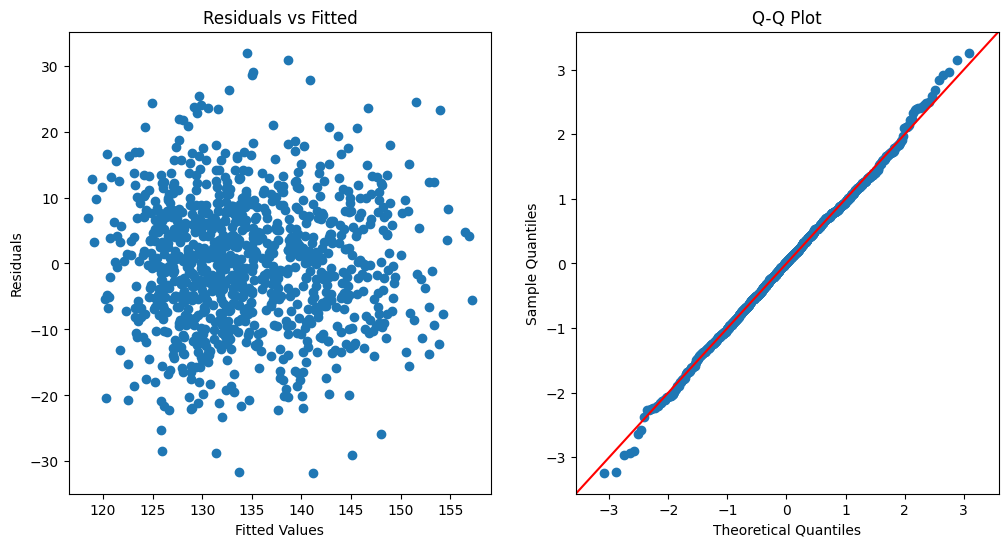

In [4]:
base_bp = pd.read_csv('patient_baseline.csv', sep='\t') #load baseline data

y = base_bp['bp_systolic'] #set blood preassure dependent variable
X = base_bp[['age', 'bmi', 'smoking','diabetes']] #set predictors 
X = sm.add_constant(X)  

model = sm.OLS(y, X) #OLS model
results = model.fit(cov_type='HC3') #fit model

print(results.summary()) #print relevant summary stats
print(results.params)
print(results.rsquared)
print(results.pvalues)

plt.figure(figsize=(12, 6))

# Residuals vs Fitted Plot
plt.subplot(1, 2, 1)
plt.scatter(x=results.fittedvalues, y=results.resid) #residual v fitted scatter plot to show relationship
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.title('Residuals vs Fitted')

# Q-Q Plot 
plt.subplot(1, 2, 2)
sm.qqplot(results.resid, line='45', fit=True, ax=plt.gca()) #qqplot of normality of residuals
plt.title('Q-Q Plot')

#Interpretation: The fitted an residual data point are pretty similar without any tight correlations. 
#While the theoretical and sample values are very positively correlated.

2. Model treatment effectiveness:
   - Fit a GLM with binomial family to predict treatment success
   - Use baseline characteristics and `adherence` as predictors
   - Report odds ratios and their confidence intervals
   - Assess model fit using deviance and diagnostic plots

                 Generalized Linear Model Regression Results                  
Dep. Variable:                outcome   No. Observations:                 1000
Model:                            GLM   Df Residuals:                      994
Model Family:                Binomial   Df Model:                            5
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -656.42
Date:                Wed, 06 Nov 2024   Deviance:                       1312.8
Time:                        21:25:57   Pearson chi2:                 1.00e+03
No. Iterations:                     4   Pseudo R-squ. (CS):            0.01896
Covariance Type:            nonrobust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -1.2681      0.691     -1.836      0.0

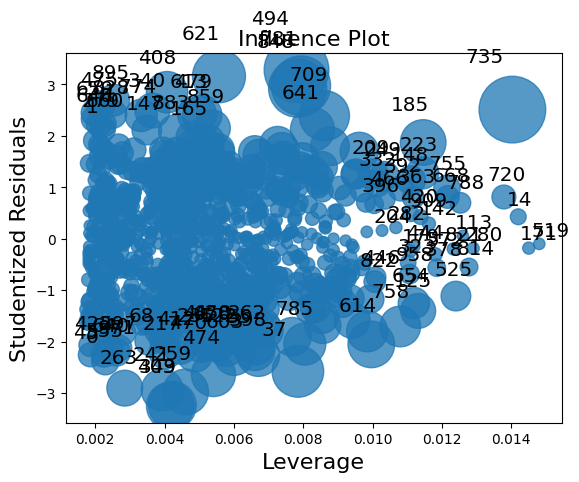

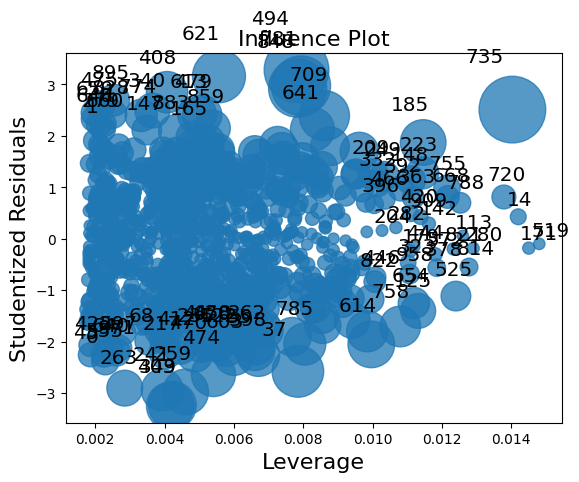

In [5]:
treatment_bp = pd.read_csv('patient_treatment.csv', sep='\t') #load treatment data

y = treatment_bp['outcome'] #set treatment outcome/success as dependent variable
X = treatment_bp[['age', 'bmi', 'smoking','diabetes', 'adherence']] #set predictors 
X = sm.add_constant(X) 

fit_model = sm.GLM(y, X, family=sm.families.Binomial()).fit()
print(fit_model.summary())

# Calculate odds ratios and 95% confidence intervals
params = fit_model.params
conf = fit_model.conf_int()
odds_ratios = np.exp(params)
conf_intervals = np.exp(conf)
odds_ratios_df = pd.DataFrame({
    'Odds Ratio': odds_ratios,
    '2.5%': conf_intervals[0],
    '97.5%': conf_intervals[1]
})
print("\nOdds Ratios and 95% Confidence Intervals:")
print(odds_ratios_df)

#Check residual deviance vs null deviance
print("\nResidual Deviance:", fit_model.deviance)
print("Null Deviance:", fit_model.null_deviance)

# Influence statistics to detect influential observations
influence = fit_model.get_influence()
leverage = influence.hat_matrix_diag
cooks = influence.cooks_distance[0]
# Outlier detection
student_resid = results.outlier_test()
# Leverage plots
sm.graphics.influence_plot(results) #plot scatter and stem plot

#Interpretation: influence plots showing many outliers in studentized ressiduals.